Dataset Title
Bangalore Rapido Ride Services Dataset

Subtitle
A Comprehensive Analysis of Ride Services in Bangalore

Overview
This dataset contains comprehensive records of ride services offered by Rapido in Bangalore over a two-month period. It includes various service types such as bike, bike lite, cab economy, auto, and parcel services. Each record provides extensive details about the ride, including the journey from a source to a destination, duration, distance, charges, and payment methods. This dataset is ideal for analyzing transportation patterns, service utilization, and ride economics in Bangalore.

Dataset Structure
The dataset is organized in a tabular format with 50,000 rows and 13 columns. Each row represents a unique ride, and the columns provide detailed information about each ride.

Column Descriptions
services

Description: Type of ride service offered by Rapido.
Values:
"bike": Standard bike ride service.
"bike lite": Economical bike ride service.
"cab economy": Standard cab ride service.
"auto": Auto-rickshaw ride service.
"parcel": Service for delivering parcels.
Distribution:
30% bike
10% bike lite
20% cab economy
25% auto
15% parcel
date

Description: The date on which the ride was initiated.
Values: Dates ranging from 60 days prior to the current date, covering approximately two months.
time

Description: The time of day when the ride started.
Values: Random times throughout the day, formatted as HH:MM:SS.
ride_status

Description: The completion status of the ride.
Values:
"completed": The ride was successfully completed.
"cancelled": The ride was cancelled.
Distribution:
90% completed
10% cancelled
source

Description: The starting location of the ride.
Values: Combinations of common Bangalore area names and suffixes (e.g., "Koramangala 1st Stage").
destination

Description: The ending location of the ride.
Values: Combinations of common Bangalore area names and suffixes, similar to the source.
duration

Description: Duration of the ride in minutes.
Values: Integer values ranging from 10 to 120 minutes.
ride_id

Description: A unique identifier for each ride.
Values: A string starting with "RD" followed by 16 random digits (e.g., "RD1234567890123456").
distance

Description: The distance covered during the ride, in kilometers.
Values: Floating-point numbers ranging from 1 to 50, rounded to two decimal places.
ride_charge

Description: The base fare charged for the ride.
Values: Floating-point numbers ranging from 50 to 1000, rounded to two decimal places. Null for cancelled rides.
misc_charge

Description: Additional charges for the ride, such as tolls or surcharges.
Values: Floating-point numbers ranging from 0 to 50, rounded to two decimal places. Null for cancelled rides.
total_fare

Description: The total fare for the ride, including base fare and miscellaneous charges.
Values: Calculated as the sum of ride_charge and misc_charge for completed rides. Null for cancelled rides.
payment_method

Description: The method of payment used for the ride.
Values:
"Amazon Pay"
"QR scan"
"GPay"
"Paytm"
Note: Null for cancelled rides.

# Rapido Dataset

In [2]:
# Importing required libraries for the project

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [3]:
df = pd.read_csv("D:/kgworkfile/rides_data.csv")
df

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,cab economy,2024-07-24,10:12:37.811393,completed,Giri Nagar Quarters,Lingarajapuram Village,79,RD1742789687725650,7.03,518.90,23.81,542.71,Amazon Pay
49996,auto,2024-08-12,11:24:08.811393,completed,Hennur Road District,Hulimavu Pier,39,RD3524793949448023,31.77,977.34,2.67,980.01,Paytm
49997,bike,2024-08-10,21:52:48.811393,completed,Agara Heights,Ulsoor 4th Block,40,RD6755775741450371,25.74,331.94,38.32,370.26,Paytm
49998,auto,2024-07-07,20:44:00.811393,completed,Hosur Colony,Kanakapura Works,111,RD9198658614373790,11.70,565.47,0.33,565.80,Amazon Pay


In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      services        date             time ride_status  \
0  cab economy  2024-07-15  08:30:40.542646   completed   
1         auto  2024-07-05  23:36:51.542646   completed   
2         auto  2024-07-23  11:05:37.542646   cancelled   
3  cab economy  2024-06-24  08:45:10.542646   completed   
4  cab economy  2024-07-15  00:26:44.542646   completed   

                   source               destination  duration  \
0         Balagere Harbor           Harohalli Nagar        39   
1  Basavanagudi 3rd Block      Bikasipura 1st Stage        89   
2        Babusapalya Cove         Kothaguda Terrace        25   
3       Mahadevapura Mews            Kanakapura Arc        89   
4         Ganganagar Cove  Basaveshwaranagar Colony        95   

              ride_id  distance  ride_charge  misc_charge  total_fare  \
0  RD3161218751875354     27.21       764.83        31.51      796.34   
1  RD8171514284594096     34.03       314.83        49.52      364.35   
2  R

In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
services             0
date                 0
time                 0
ride_status          0
source               0
destination          0
duration             0
ride_id              0
distance             0
ride_charge       5036
misc_charge       5036
total_fare        5036
payment_method    5036
dtype: int64


In [6]:
print("\nSummary statistics for categorical columns:")
print(df.describe(include=['object']))


Summary statistics for categorical columns:
       services        date             time ride_status            source  \
count     50000       50000            50000       50000             50000   
unique        5          61            49363           2             12982   
top        bike  2024-08-03  00:52:10.689686   completed  Kothanur Landing   
freq      15128         888                3       44964                23   

              destination             ride_id payment_method  
count               50000               50000          44964  
unique              12977               50000              4  
top     Gottigere Landing  RD3161218751875354          Paytm  
freq                   23                   1          11315  


In [7]:
print("\nUnique values in each categorical column:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique values in each categorical column:
services: 5 unique values
date: 61 unique values
time: 49363 unique values
ride_status: 2 unique values
source: 12982 unique values
destination: 12977 unique values
ride_id: 50000 unique values
payment_method: 4 unique values


In [8]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [9]:
# Example: Removing outliers from the 'duration' column
df_cleaned = remove_outliers(df, 'duration')

print("\nSummary statistics after outlier removal (for 'duration'):")
print(df_cleaned['duration'].describe())


Summary statistics after outlier removal (for 'duration'):
count    50000.000000
mean        64.320100
std         31.852336
min         10.000000
25%         37.000000
50%         64.000000
75%         92.000000
max        119.000000
Name: duration, dtype: float64


In [10]:
# Fill missing numeric values with median
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

In [11]:
# Fill missing categorical values with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [12]:

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
services          0
date              0
time              0
ride_status       0
source            0
destination       0
duration          0
ride_id           0
distance          0
ride_charge       0
misc_charge       0
total_fare        0
payment_method    0
dtype: int64


Text(0.5, 1.0, 'Distribution of Ride Duration')

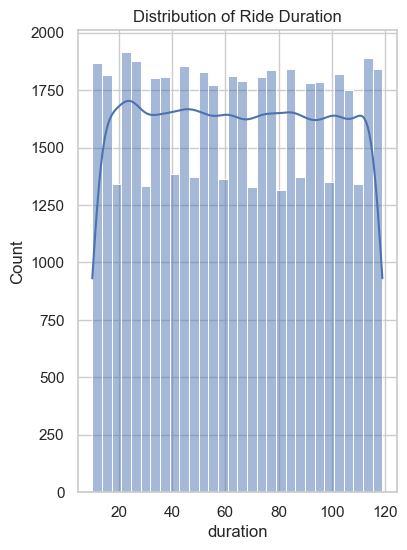

In [13]:
# Setting up the visual style
sns.set(style="whitegrid")

# 7.1 Visualize the distribution of ride_duration and its relation to ride_charge and distance
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribution of Ride Duration')

Text(0.5, 1.0, 'Duration vs. Ride Charge')

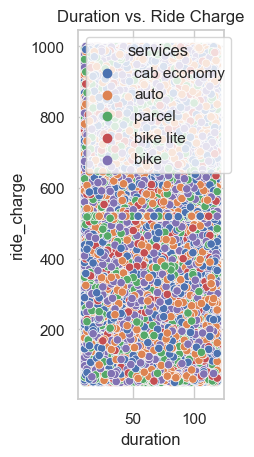

In [14]:
plt.subplot(1, 3, 2)
sns.scatterplot(x='duration', y='ride_charge',hue='services', data=df)
plt.title('Duration vs. Ride Charge')

Text(0.5, 1.0, 'Duration vs. Distance')

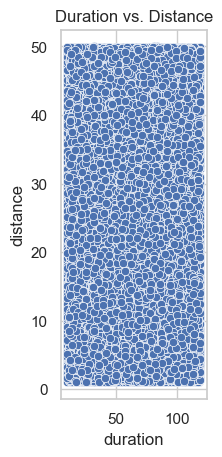

In [15]:
plt.subplot(1, 3, 3)
sns.scatterplot(x='duration', y='distance', data=df)
plt.title('Duration vs. Distance')

<Figure size 640x480 with 0 Axes>

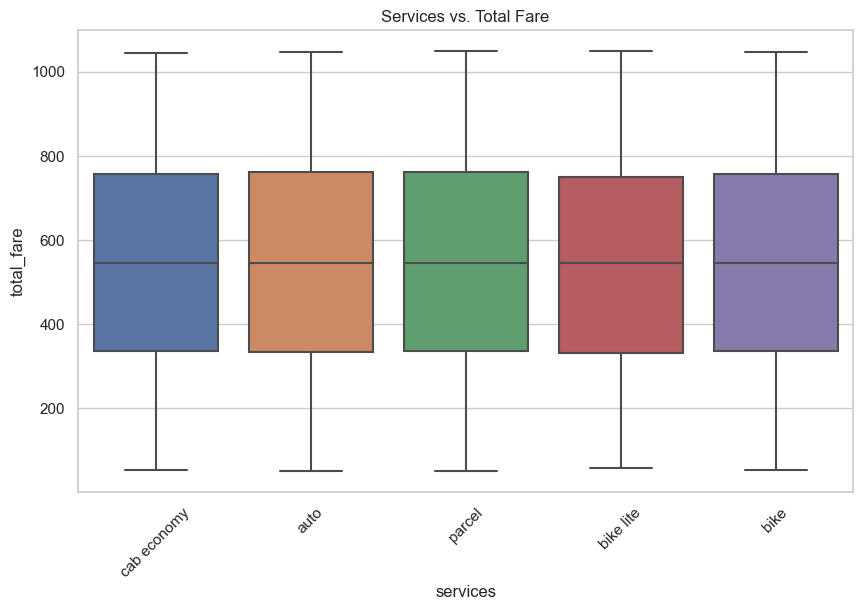

In [16]:
plt.tight_layout()
plt.show()

# 7.2 Visualize the relation between services and total_fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='services', y='total_fare', data=df)
plt.title('Services vs. Total Fare')
plt.xticks(rotation=45)
plt.show()

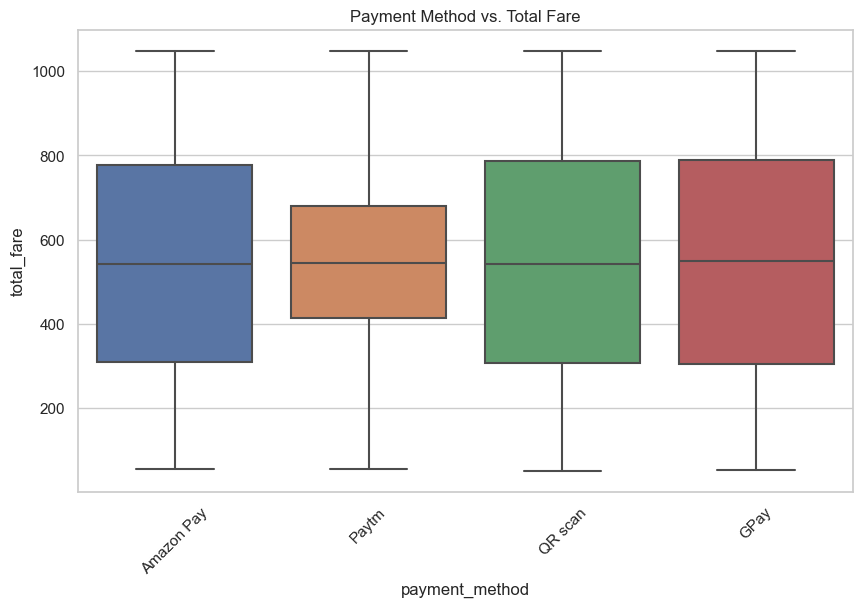

In [17]:
# 7.4 Visualize the distribution of payment methods and their associated total fares
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_method', y='total_fare', data=df)
plt.title('Payment Method vs. Total Fare')
plt.xticks(rotation=45)
plt.show()

In [18]:
df

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,520.03,25.07,544.92,Paytm
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,cab economy,2024-07-24,10:12:37.811393,completed,Giri Nagar Quarters,Lingarajapuram Village,79,RD1742789687725650,7.03,518.90,23.81,542.71,Amazon Pay
49996,auto,2024-08-12,11:24:08.811393,completed,Hennur Road District,Hulimavu Pier,39,RD3524793949448023,31.77,977.34,2.67,980.01,Paytm
49997,bike,2024-08-10,21:52:48.811393,completed,Agara Heights,Ulsoor 4th Block,40,RD6755775741450371,25.74,331.94,38.32,370.26,Paytm
49998,auto,2024-07-07,20:44:00.811393,completed,Hosur Colony,Kanakapura Works,111,RD9198658614373790,11.70,565.47,0.33,565.80,Amazon Pay


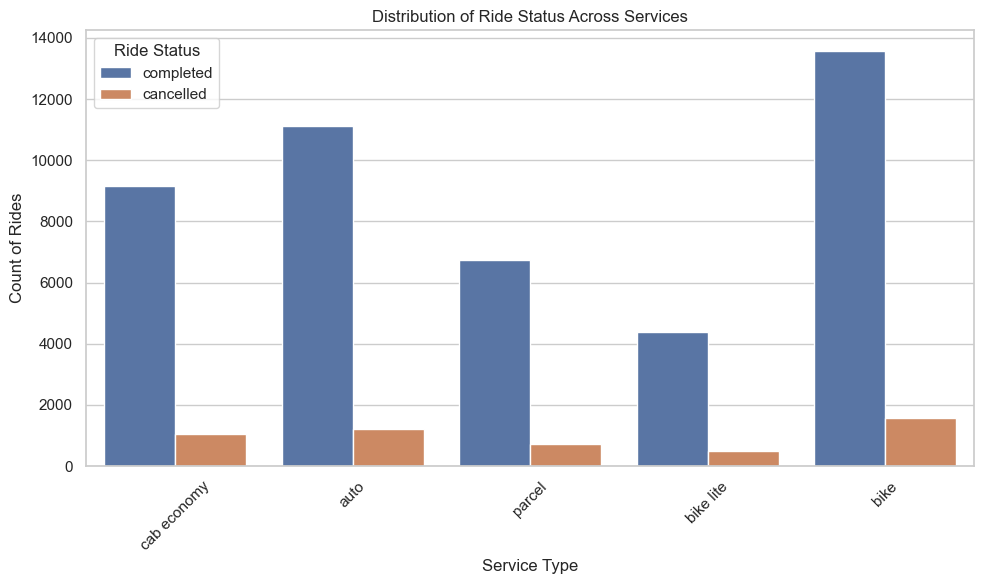

In [19]:
# Set up the visual style
sns.set(style="whitegrid")

# Create the count plot for services and ride status
plt.figure(figsize=(10, 6))
sns.countplot(x='services', hue='ride_status', data=df)
plt.title('Distribution of Ride Status Across Services')
plt.xlabel('Service Type')
plt.ylabel('Count of Rides')
plt.xticks(rotation=45)
plt.legend(title='Ride Status')
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
df['source'].unique()

array(['Balagere Harbor', 'Basavanagudi 3rd Block', 'Babusapalya Cove',
       ..., 'Ashok Nagar 1st Stage', 'Jakkur Cross', 'Whitefield Grove'],
      dtype=object)

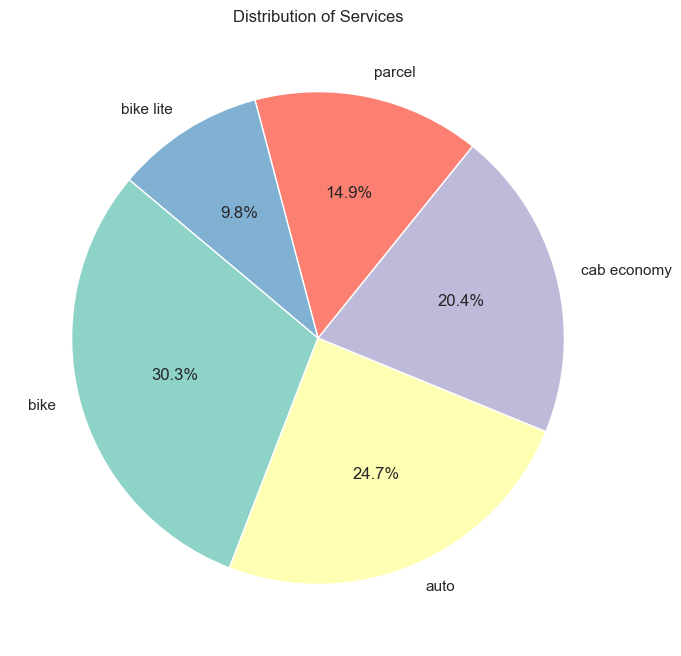

In [21]:
# Count the occurrences of each service
service_counts = df['services'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(service_counts, labels=service_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))

# Add a title
plt.title('Distribution of Services')

# Show the plot
plt.show()

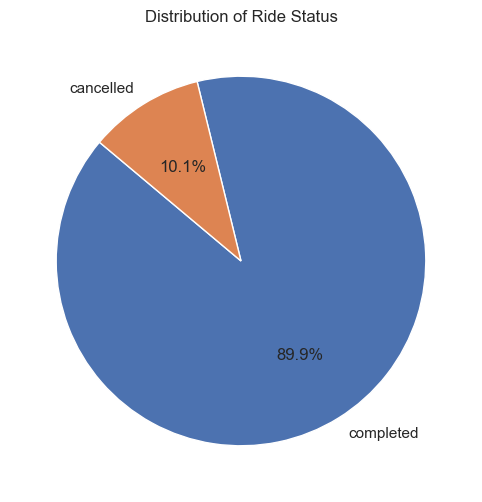

In [22]:
# Count occurrences of each ride_status
status_counts = df['ride_status'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ride Status')
plt.show()

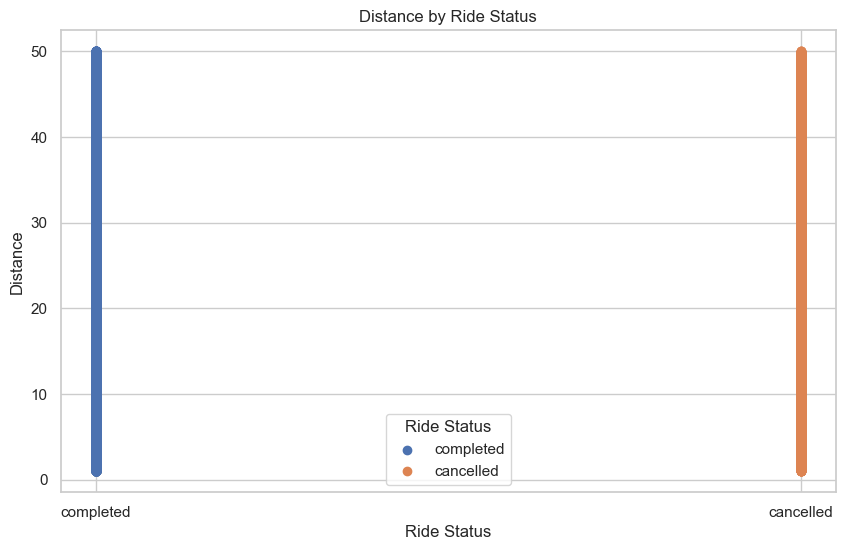

In [23]:
# Create scatter plot
plt.figure(figsize=(10, 6))
for status in df['ride_status'].unique():
    subset = df[df['ride_status'] == status]
    plt.scatter(subset['ride_status'], subset['distance'], label=status)

plt.xlabel('Ride Status')
plt.ylabel('Distance')
plt.title('Distance by Ride Status')
plt.legend(title='Ride Status')
plt.show()

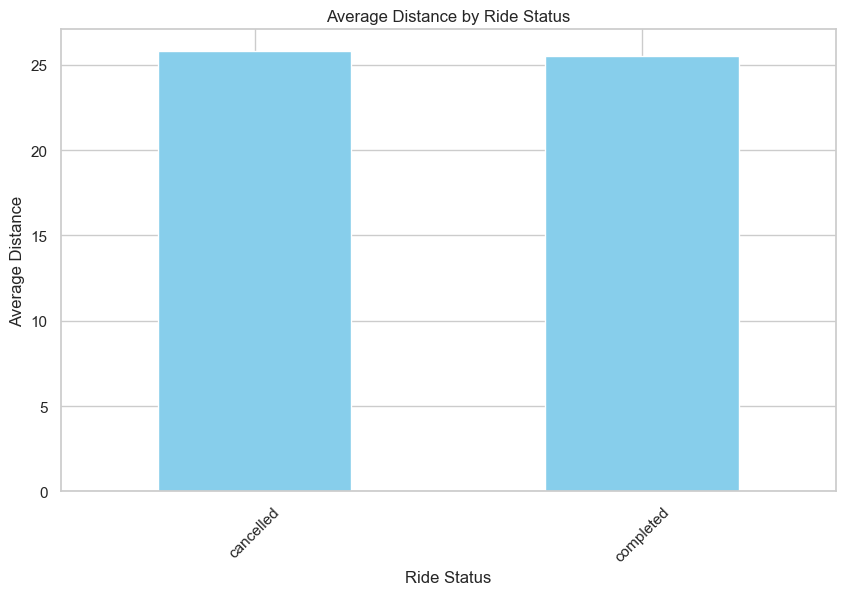

In [24]:
# Calculate average distance for each ride status
average_distance = df.groupby('ride_status')['distance'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
average_distance.plot(kind='bar', color='skyblue')
plt.xlabel('Ride Status')
plt.ylabel('Average Distance')
plt.title('Average Distance by Ride Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

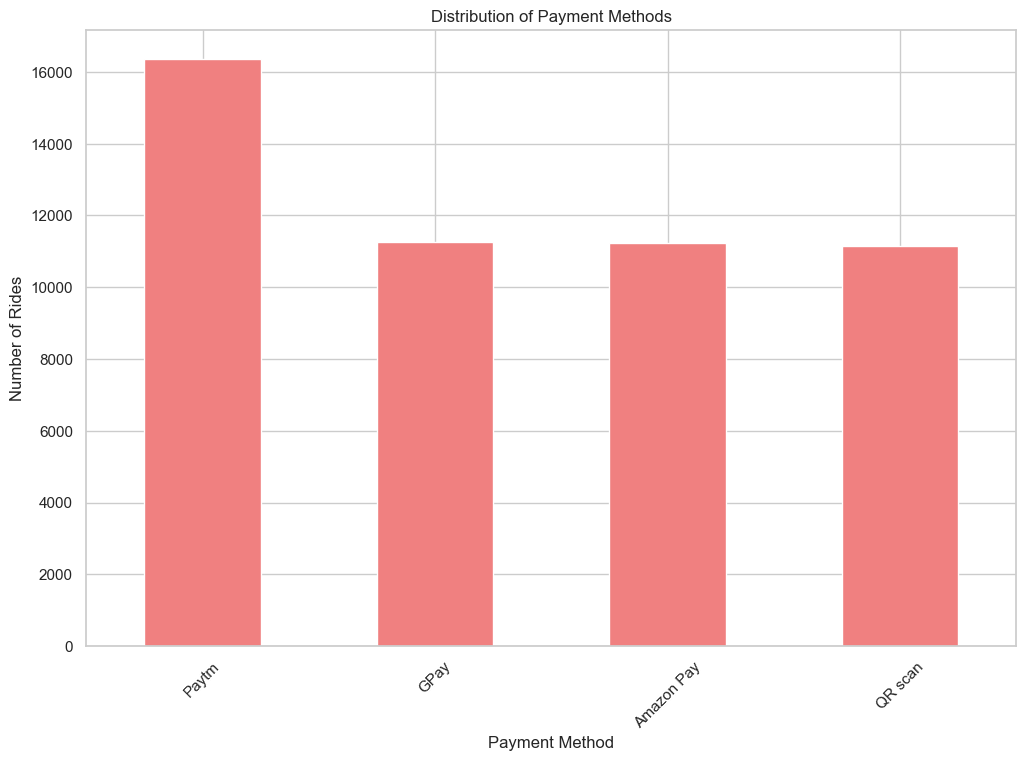

In [25]:
# Count occurrences of each payment method
payment_counts = df['payment_method'].value_counts()

# Create bar chart
plt.figure(figsize=(12, 8))
payment_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Payment Method')
plt.ylabel('Number of Rides')
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

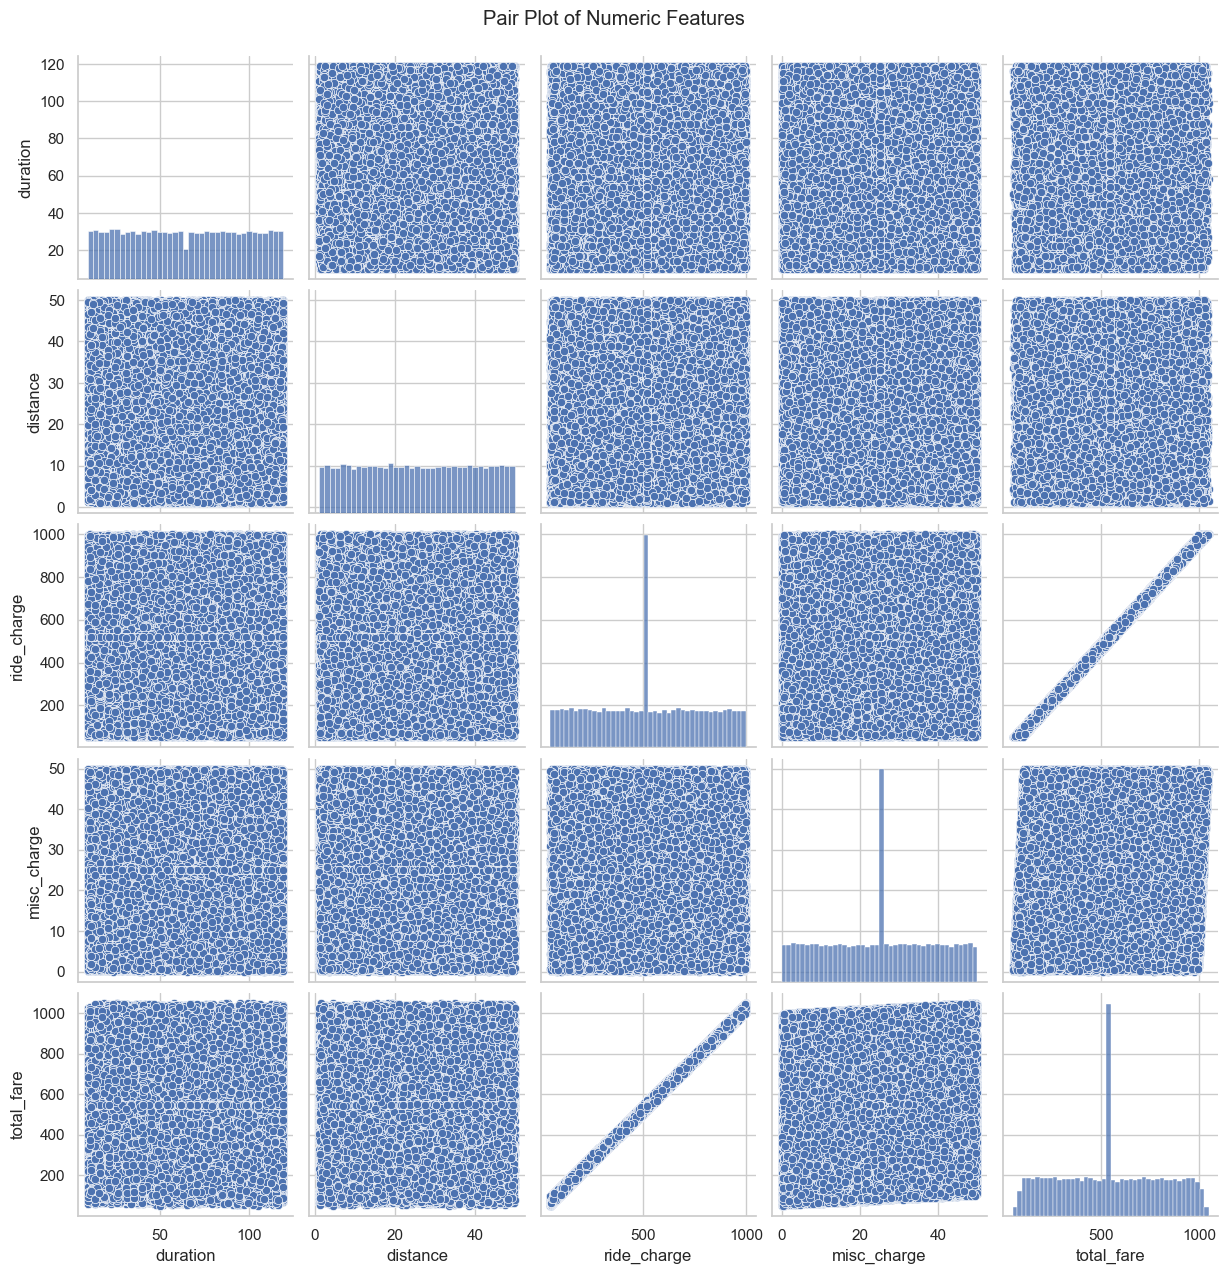

In [26]:
numeric_df = df[['duration', 'distance', 'ride_charge', 'misc_charge', 'total_fare']]

# Create pair plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

In [27]:
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print(df)

          services       date             time ride_status  \
0      cab economy 2024-07-15  08:30:40.542646   completed   
1             auto 2024-07-05  23:36:51.542646   completed   
2             auto 2024-07-23  11:05:37.542646   cancelled   
3      cab economy 2024-06-24  08:45:10.542646   completed   
4      cab economy 2024-07-15  00:26:44.542646   completed   
...            ...        ...              ...         ...   
49995  cab economy 2024-07-24  10:12:37.811393   completed   
49996         auto 2024-08-12  11:24:08.811393   completed   
49997         bike 2024-08-10  21:52:48.811393   completed   
49998         auto 2024-07-07  20:44:00.811393   completed   
49999  cab economy 2024-08-07  08:53:25.811393   completed   

                       source               destination  duration  \
0             Balagere Harbor           Harohalli Nagar        39   
1      Basavanagudi 3rd Block      Bikasipura 1st Stage        89   
2            Babusapalya Cove         Kothaguda 

In [28]:
df

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,month,year
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,7,2024
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,7,2024
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,520.03,25.07,544.92,Paytm,7,2024
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan,6,2024
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay,7,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,cab economy,2024-07-24,10:12:37.811393,completed,Giri Nagar Quarters,Lingarajapuram Village,79,RD1742789687725650,7.03,518.90,23.81,542.71,Amazon Pay,7,2024
49996,auto,2024-08-12,11:24:08.811393,completed,Hennur Road District,Hulimavu Pier,39,RD3524793949448023,31.77,977.34,2.67,980.01,Paytm,8,2024
49997,bike,2024-08-10,21:52:48.811393,completed,Agara Heights,Ulsoor 4th Block,40,RD6755775741450371,25.74,331.94,38.32,370.26,Paytm,8,2024
49998,auto,2024-07-07,20:44:00.811393,completed,Hosur Colony,Kanakapura Works,111,RD9198658614373790,11.70,565.47,0.33,565.80,Amazon Pay,7,2024


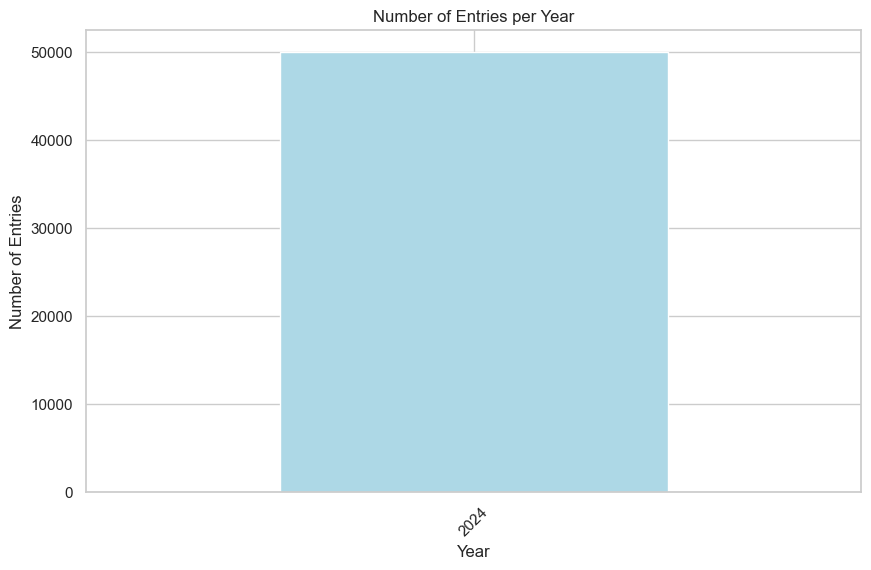

In [29]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year
df['year'] = df['date'].dt.year

# Count occurrences of each year
year_counts = df['year'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

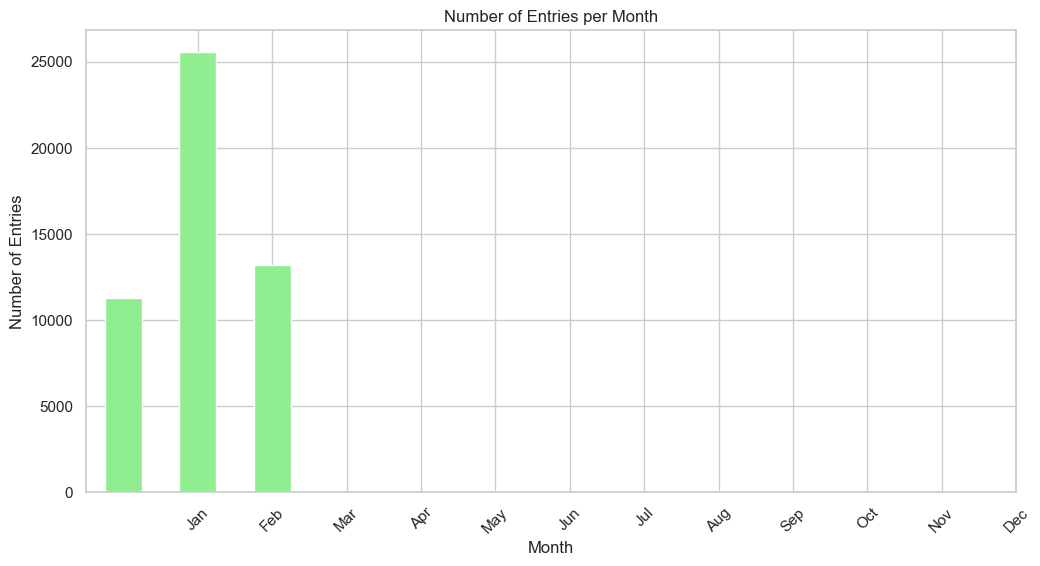

In [30]:
# Extract month
df['month'] = df['date'].dt.month

# Count occurrences of each month
month_counts = df['month'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [31]:
df['month'].unique()

array([7, 6, 8])

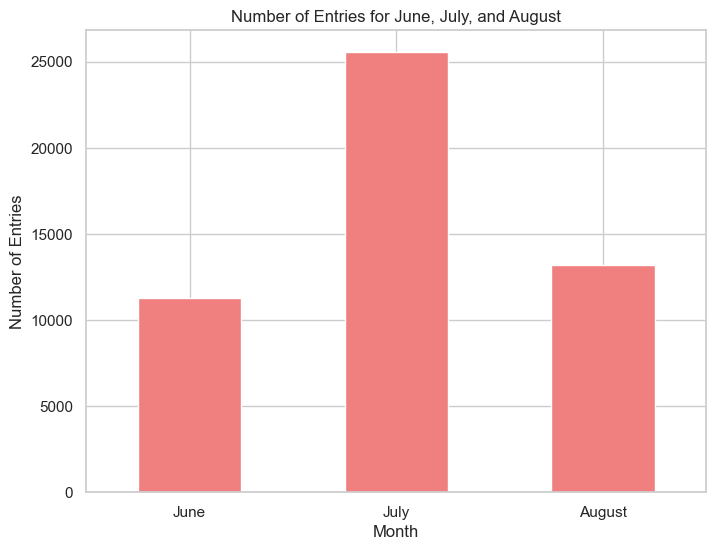

In [32]:
df['month'] = df['date'].dt.month

# Filter for June, July, and August
df_filtered = df[df['month'].isin([6, 7, 8])]

# Count occurrences of each month
month_counts = df_filtered['month'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.title('Number of Entries for June, July, and August')
plt.xticks(ticks=range(3), labels=['June', 'July', 'August'], rotation=0)
plt.show()

In [33]:
df["date"]=pd.to_datetime(df["date"],dayfirst=True)
df["day"]=df["date"].dt.day
df["day"]=pd.cut(x=df["day"],bins=[0,10,20,31])
df["day"]= df["day"].cat.codes
df["day"] = df["day"].map({0:"Beginning of Month",1:"Middle of Month",2:"End of Month"})
df["day"]

0           Middle of Month
1        Beginning of Month
2              End of Month
3              End of Month
4           Middle of Month
                ...        
49995          End of Month
49996       Middle of Month
49997    Beginning of Month
49998    Beginning of Month
49999    Beginning of Month
Name: day, Length: 50000, dtype: object

In [34]:
df

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,month,year,day
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,7,2024,Middle of Month
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,7,2024,Beginning of Month
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,520.03,25.07,544.92,Paytm,7,2024,End of Month
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan,6,2024,End of Month
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay,7,2024,Middle of Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,cab economy,2024-07-24,10:12:37.811393,completed,Giri Nagar Quarters,Lingarajapuram Village,79,RD1742789687725650,7.03,518.90,23.81,542.71,Amazon Pay,7,2024,End of Month
49996,auto,2024-08-12,11:24:08.811393,completed,Hennur Road District,Hulimavu Pier,39,RD3524793949448023,31.77,977.34,2.67,980.01,Paytm,8,2024,Middle of Month
49997,bike,2024-08-10,21:52:48.811393,completed,Agara Heights,Ulsoor 4th Block,40,RD6755775741450371,25.74,331.94,38.32,370.26,Paytm,8,2024,Beginning of Month
49998,auto,2024-07-07,20:44:00.811393,completed,Hosur Colony,Kanakapura Works,111,RD9198658614373790,11.70,565.47,0.33,565.80,Amazon Pay,7,2024,Beginning of Month


In [35]:
df['destination'].nunique()

12977

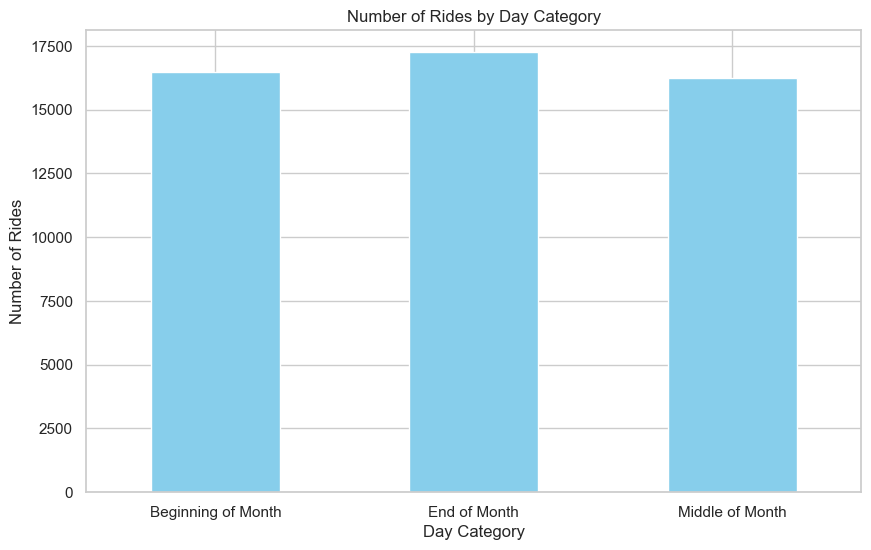

In [36]:
# Create DataFrame
df = pd.DataFrame(df)

# Count occurrences of each 'day' category
day_counts = df['day'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day Category')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Day Category')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [37]:
df['pair'] = df['source'] + '-' + df['destination']
pair_counts = df['pair'].value_counts().reset_index()
pair_counts.columns = ['pair', 'count']
print(pair_counts)

                                                    pair  count
0                        Jayanagar Cut-Yelahanka Landing      2
1             Kundalahalli 6th Stage-Gottigere 5th Stage      2
2           Basaveshwaranagar Place-Kalena Agrahara Fork      2
3             Magadi Road 5th Stage-Rachenahalli Landing      2
4                         Anekal Woods-Yelahanka Complex      2
...                                                  ...    ...
49988  Dr. Shivaram Karanth Nagar Place-Kumaraswamy L...      1
49989  ITI Layout District-Dr. Shivaram Karanth Nagar...      1
49990           Shivaji Nagar View-RMV 2nd Stage Cutting      1
49991         Hebbal Kempapura Landing-Nelamangala Farms      1
49992               BTM 2nd Stage Depot-Thanisandra Pass      1

[49993 rows x 2 columns]


destination
Gottigere Landing      23
Gottigere Square       20
HRBR Layout Drive      17
Kudlu Square           17
Harohalli Landing      16
Hulimavu Drive         16
Gottigere 6th Block    16
Kalyan Nagar Trail     15
Gottigere District     15
HRBR Layout Square     15
Name: count, dtype: int64


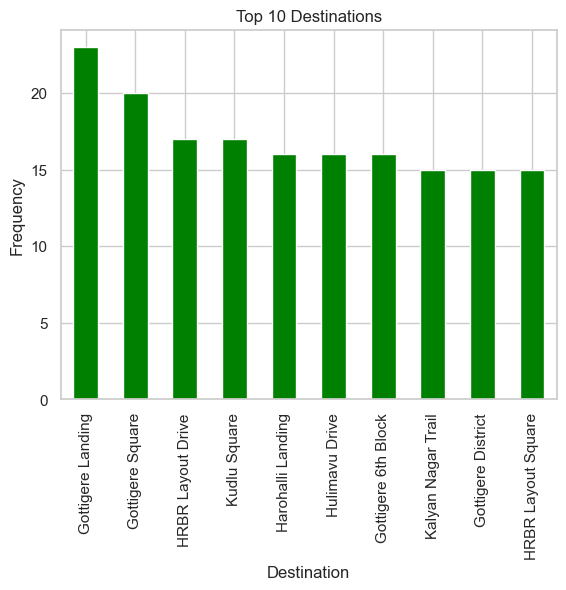

In [38]:
top_10_destinations = df['destination'].value_counts().head(10)
print(top_10_destinations)
top_10_destinations.plot(kind='bar', color='green')
plt.title('Top 10 Destinations')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.show()

source
Kothanur Landing            23
Banaswadi Landing           20
Vijayanagar Square          20
HRBR Layout Landing         19
Ramamurthy Nagar Landing    18
Banaswadi Square            17
HRBR Layout Square          16
Kalyan Nagar Close          15
Kalyan Nagar Landing        15
Chokkanahalli Landing       15
Name: count, dtype: int64


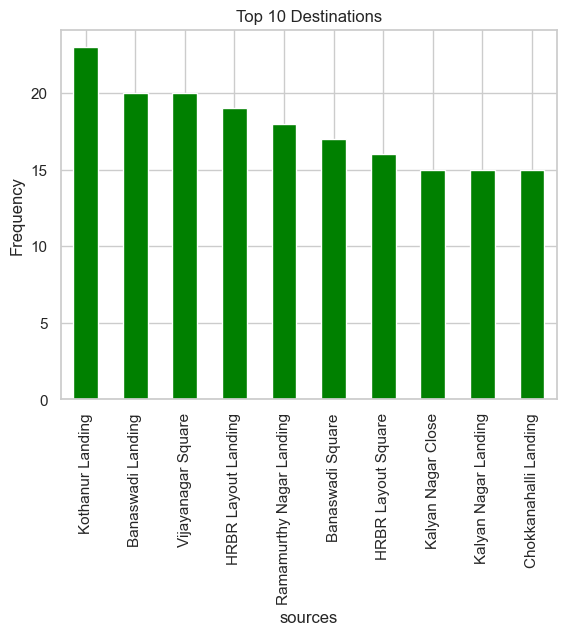

In [39]:
top_10_destinations = df['source'].value_counts().head(10)
print(top_10_destinations)
top_10_destinations.plot(kind='bar', color='green')
plt.title('Top 10 Destinations')
plt.xlabel('sources')
plt.ylabel('Frequency')
plt.show()

In [40]:
## Chi square
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['services'], df['ride_status'])

chi2_result = chi2_contingency(contingency_table, correction = False)
print("Chi-Square test result:",chi2_result)

Chi-Square test result: Chi2ContingencyResult(statistic=4.8248564271951695, pvalue=0.305744929116748, dof=4, expected_freq=array([[ 1241.57544, 11085.42456],
       [ 1523.69216, 13604.30784],
       [  491.91648,  4392.08352],
       [ 1027.54544,  9174.45456],
       [  751.27048,  6707.72952]]))


In [41]:
alpha=0.05
pvalue = 0.305744929116748
if pvalue <alpha:
    print(f"Reject the null hypothesis at alpha = {alpha}.")
    print("There is a statistically significant association between services and ride Status in your data.")
else:
    print(f"Fail to reject the null hypothesis at alpha = {alpha}.")

Fail to reject the null hypothesis at alpha = 0.05.


In [42]:
## One way anova
from scipy import stats
from scipy.stats import ttest_1samp

f_statistics, p_value = stats.f_oneway(df['total_fare'][df['day'] == 'Beginning of Month'],
                                       df['total_fare'][df['day'] == 'Middle of Month'],
                                       df['total_fare'][df['day'] == 'End of Month'])

alpha = 0.05
print("F-Statistics:", f_statistics)
print("p-Value:", p_value)
print("")

if p_value < alpha:
    print(f"Reject the null hypothesis at alpha = {alpha}.")
    print("There is a statistically significant difference in the average of fare across the Days.")
else:
    print(f"Fail to reject the null hypothesis at alpha = {alpha}.")
    print("There is no statistically significant difference in the average of fare across the Days.")

F-Statistics: 0.6295625309485232
p-Value: 0.532829068291262

Fail to reject the null hypothesis at alpha = 0.05.
There is no statistically significant difference in the average of fare across the Days.


In [43]:
mean_fare = df.groupby('day')['total_fare'].mean()
print(mean_fare)

day
Beginning of Month    548.956113
End of Month          546.621834
Middle of Month       545.859227
Name: total_fare, dtype: float64


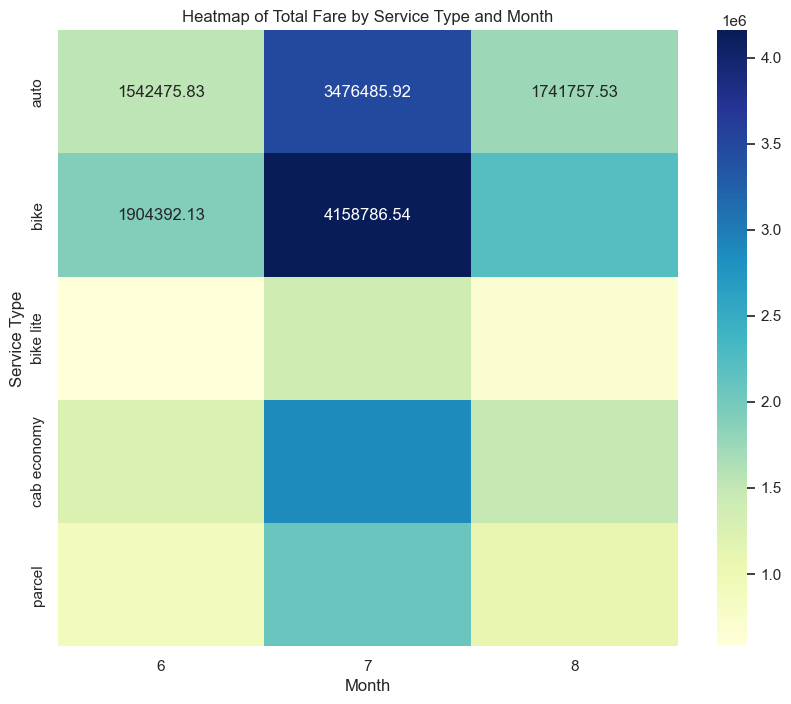

In [44]:
heatmap_data = df.pivot_table(values='total_fare', 
                              index='services', 
                              columns='month', 
                              aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Total Fare by Service Type and Month')
plt.xlabel('Month')
plt.ylabel('Service Type')
plt.show()